In [1]:
pip show numba

Name: numba
Version: 0.57.1
Summary: compiling Python code using LLVM
Home-page: https://numba.pydata.org
Author: 
Author-email: 
License: BSD
Location: /home/alireza/miniconda3/envs/w_env/lib/python3.11/site-packages
Requires: llvmlite, numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip show numpy

Name: numpy
Version: 1.23.0
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: /home/alireza/miniconda3/envs/w_env/lib/python3.11/site-packages
Requires: 
Required-by: anndata, chex, contourpy, funsor, h5py, jax, jaxlib, matplotlib, ml-dtypes, numba, numcodecs, numpyro, opencv-python, opt-einsum, optax, pandas, pyimzML, pymzml, pyro-ppl, scikit-learn, scipy, seaborn, zarr
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip show jaxlib

Name: jaxlib
Version: 0.4.14+cuda12.cudnn89
Summary: XLA library for JAX
Home-page: https://github.com/google/jax
Author: JAX team
Author-email: jax-dev@google.com
License: Apache-2.0
Location: /home/alireza/miniconda3/envs/w_env/lib/python3.11/site-packages
Requires: ml-dtypes, numpy, scipy
Required-by: chex, numpyro, optax
Note: you may need to restart the kernel to use updated packages.


In [4]:
!conda env list

# conda environments:
#
base                     /home/alireza/miniconda3
lipidatlas               /home/alireza/miniconda3/envs/lipidatlas
myenv                    /home/alireza/miniconda3/envs/myenv
w_env                 *  /home/alireza/miniconda3/envs/w_env



In [5]:
import src as MAIA
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import os

In [6]:
section = '8hpf/20230639_Zebrafish_ctrl_cl5_8hpf_section_9_167x182_Att35_5um'

path = '/data/SV_DAngelo/Leila/MALDI-MSI/MAIA_zebrafish/Atlases/Controls_timepoints/'

smz = MAIA.utils.SmzMLobj(f'{path+section}/{section[5:]}.IBD',
               f'{path+section}/{section[5:]}.imzml',
               mz_resolution=10e-5, selected_pixels=(0,100)) #for section in sections]
       
smz.load(load_unique_mz=True)

Loading Spectra at resolution 0.0001: 100%|███████████████████████████████| 100/100 [00:00<00:00, 235.56it/s]
Loading the m/z values at resolution 0.0001: 100it [00:00, 7728.59it/s]


In [7]:
mz_resolution = 0.0001
threshold_count = 8.
approximate_interval =1.5
smoothing = 1. #2.5

In [8]:
MAIA.pf.run(directory_path=f'{path}{section}/CHECK/',
                smz=smz, spectrum_range=(400,1200), threshold_count=threshold_count, 
                approximate_interval=approximate_interval, parallelize=True, smoothing=smoothing, saveimages=True)

100it [00:00, 160.13it/s]


Partioning m/z space and beginning peakcalling...


100%|██████████████████████████████████████████████████████████████████████| 107/107 [00:11<00:00,  9.07it/s]


Creating dataframe...


100%|██████████████████████████████████████████████████████████████████| 1426/1426 [00:00<00:00, 1561.36it/s]


DataFrame created successfully
Removing temporary storage
Saving images...


100%|███████████████████████████████████████████████████████████████████| 1411/1411 [00:10<00:00, 132.84it/s]


Complete


In [9]:
import re
import zarr
import tqdm
from scipy.ndimage import gaussian_filter

In [10]:
reg_size = '\d{1,4}[x,X]{1}\d{1,4}'

# developmental timepoints 8/24/48/72
# developmental timepoints 48,72
acquisitions=[
    
    # fish 1 8h
#     'Atlas_8hpf1/20221014_Zebrafish_8hpf_fish1_section30_215x230_Att35_5um',
#     'Atlas_8hpf1/20221013_Zebrafish_8hpf_fish1_section28_214x214_Att35_5um',
    #'Atlas_8hpf1/20221010_Zebrafish_8hpf_fish1_section23_192x202_Att35_5um',
    '20221008_Zebrafish_8hpf_fish1_section18_194x170_Att35_5um',
    '20221002_Zebrafish_8hpf_fish1_section_16_192x190_Att35_5um',
    '20221002_Zebrafish_8hpf_fish1_section_14_154x148_Att35_5um',
    #'Atlas_8hpf1/20221001_Zebrafish_8hpf_fish1_section_10_154x142_Att35_5um',
    
    # fish 2 8h
    #'Atlas_8hpf2/20221008_Zebrafish_8hpf_fish2_section9_130x134_Att35_5um',
    #'Atlas_8hpf2/20221003_Zebrafish_8hpf_fish2_section_7_140x122_Att35_5um',
    
    
    # fish 1 24h
#     'Atlas_24h/20220408_Zebrafish_atlas_24h_fish1_section17_175x155_Att35_7um',
    #'Atlas_24h/20220407_Zebrafish_atlas_24h_fish1_section30_167x134_Att35_7um',
    '20220407_Zebrafish_atlas_24h_fish1_section28_131x124_Att35_7um',
    '20220407_Zebrafish_atlas_24h_fish1_section26_141x140_Att35_7um',
    '20220406_Zebrafish_atlas_24h_fish1_section24_140x145_Att35_7um',
#     'Atlas_24h/20220405_Zebrafish_atlas_24h_fish1_section20_157x142_Att35_7um',
    #'Atlas_24h/20220406_Zebrafish_atlas_24h_fish1_section22_151x150_Att35_7um',
    #'Atlas_24h/20220402_Zebrafish_atlas_24h_fish1_section16_228x154_Att35_7um',
    
    # fish 2 24h
    #'Atlas_24h/20220928_Zebrafish_atlas_24hpf_fish2_section26_256x126_Att35_7um',
    #'Atlas_24h/20220927_Zebrafish_atlas_24hpf_fish2_section18_284x125_Att35_7um',
    #'Atlas_24h/20220927_Zebrafish_atlas_24hpf_fish2_section10_141x128_Att35_7um',
    #'Atlas_24h/20220926_Zebrafish_atlas_24hpf_fish2_section2_131x124_Att35_7um',
    # fish 1 48h
    #'Atlas_48h/11022022_Zebrafish_atlas_section19_Att35_353x141_7um',
    #'Atlas_48h/20022022_Zebrafish_atlas_section23_313x107_Att35_7um',
    #'Atlas_48h/20022022_Zebrafish_atlas_section25_334x110_Att35_7um',
    
    # fish 2 48h
    '20220928_Zebrafish_atlas_48hpf_fish3_section18_332x133_Att35_7um',
#     'Atlas_48hpf_fish2/20220330_Zebrafish_atlas_48h_fish2_section29_150x114_Att35_7um',
    '20220329_Zebrafish_atlas_48h_fish2_section24_377x145_Att35_7um',
#     'Atlas_48hpf_fish2/20220328_Zebrafish_atlas_48h_fish2_section26_200x135_Att35_7um',
    #'Atlas_48hpf_fish2/20220316_Zebrafish_atlas_48h_fish2_section9_200x134_Att35_7um',
    #'Atlas_48hpf_fish2/20220316_Zebrafish_atlas_48h_fish2_section17_405x145_Att35_7um',
    #'Atlas_48hpf_fish2/20220328_Zebrafish_atlas_48h_fish2_section14_323x144_Att35_7um',
    #'Atlas_48hpf_fish2/20220316_Zebrafish_atlas_48h_fish2_section13_305x127_Att35_7um',
    #'Atlas_48hpf_fish2/20220314_Zebrafish_atlas_48h_fish2_section22_385x142_Att35_7um',
    
  
    # fish 1 72
    #'Atlas_72h/20220529_Zebrafish_atlas_72h_fish1_section22_423x142_Att35_7um',
    #'Atlas_72h/20220529_Zebrafish_atlas_72h_fish1_section35_271x137_Att35_7um',
    #'Atlas_72h/20220604_Zebrafish_atlas_72h_section26_413x132_Att35_7um',
    #'Atlas_72h/20220604_Zebrafish_atlas_72h_section33_292x143_Att35_7um',
    #'Atlas_72h/20220614_Zebrafish_atlas_72h_section_31_343x124_Att35_7um',
    
    # fish 2 72
    '20220620_Zebrafish_atlas_72hpf_fish2_section22_420x142_Att35_7um',
    '20220620_Zebrafish_atlas_72hpf_fish2_section26_345x136_Att35_7um',
#     'Atlas_72h_fish2/20220621_Zebrafish_atlas_72hpf_fish2_section_20_481x136_Att35_7um',
    '20220621_Zebrafish_atlas_72hpf_fish2_section24_422x135_Att35_7um',
#     'Atlas_72h_fish2/20220701_Zebrafish_atlas_72hpf_fish2_section_14_407x132_Att35_7um',
#     'Atlas_72h_fish2/20220701_Zebrafish_atlas_72hpf_fish2_section_16_420x124_Att35_7um',
#     'Atlas_72h_fish2/20220702_Zebrafish_atlas_72hpf_fish2_section_32_170x108_Att35_7um',
    
]

    

# files = [f'/data/hannah/zebrafish/multiple_timepoints/metadata/{section}/ranges.csv' for section in acquisitions]
image_shapes = np.array([re.findall(reg_size, a)[0].lower().split('x') for a in acquisitions], dtype=int)[:,::-1]
masks = [np.load(f'/data/SV_DAngelo/Hannah/zebrafish_masks/{section}/mask.npy') for section in acquisitions]
mask_ix_list = [np.argwhere(x.flatten()).flatten() for x in masks]

In [11]:
NAME_FOLDER = '07082023_alltimepoints_selectsections'
PATH_DATA = f'/data/SV_DAngelo/Hannah/processedData/zebrafish/mutiple_timepoints/{NAME_FOLDER}.zarr'

# load data
root = zarr.open(PATH_DATA, mode='rb')
PATH_MZ = np.sort(list(root.group_keys()))

In [12]:
small_num = 0.0002
x = np.ones((np.max([len(np.argwhere(x.flatten()).flatten()) for x in masks]), len(masks), len(PATH_MZ))) * np.log(small_num)

mask = np.zeros_like(x, dtype=bool)

for i_v, mz in tqdm.tqdm(enumerate(PATH_MZ)): # for a single molecule:

    for i_s in range(len(acquisitions)): # for a single molecule across the sections
    
        try:
            image = root[mz][i_s][:]
            image = gaussian_filter(image, sigma=0.3)
        except:
            continue
            
        if np.sum(image.astype(float)) == 0.0:
            print(i_v)
            image = np.ones_like(image).astype(float) * np.log(small_num)
        else:
            image = np.log(np.nan_to_num(image).astype(float) + small_num)

            
        # extract masked image
        img_masked = image.flatten()[mask_ix_list[i_s]]
        x[:len(mask_ix_list[i_s]), i_s, i_v] = img_masked
        mask[:len(mask_ix_list[i_s]), i_s, i_v] = True

554it [00:54, 10.09it/s]


In [13]:
# always take the first 2000 samples from the list, because there are some sections that have very few datapoints
np.random.seed(3)
# average_num_pixels = int(np.mean(mask.sum(axis=0)[:,0]))
# ix_random = np.random.choice(np.arange(2000, average_num_pixels), size=2000, replace=False)
# ix_random = np.append(np.arange(500), ix_random)

# x = x[ix_random,:,:]
# mask = mask[ix_random,:,:]

N, S, V = x.shape
SN = np.array([len(x) for x in mask_ix_list])[-12:]

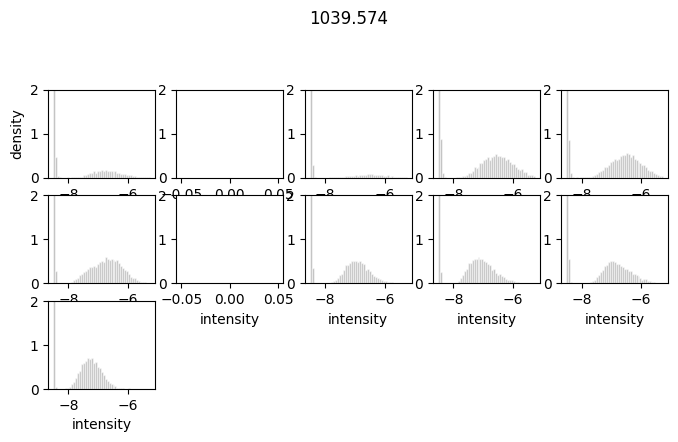

In [14]:
fig = plt.figure(None,(8,8), dpi=100)
gs = plt.GridSpec(6,5)
  
v = 7

def place_image(mask_list, tranformed_values, v, s, small_num):
    img = np.zeros(mask_list[s].shape).flatten()
    img[mask_list[s].flatten()] = np.exp(tranformed_values[:np.sum(mask_list[s]),s,v]) - small_num
    return img.reshape(mask_list[s].shape)


cm = plt.cm.get_cmap('bwr')
xmin, xmax = np.percentile(x[:,:,v][mask[:,:,v]], (0.1, 99.90))
xnew = np.linspace(xmin, xmax, 50)
vmax = np.exp(np.percentile(x[:,:,v][mask[:,:,v]], 99.9)) - small_num

for i, s in enumerate(range(S)):
    plt.subplot(gs[i])
    n, bins, patches = plt.hist(x[:,s,v][mask[:,s,v]], bins=xnew,
                                color="gray", alpha=0.6, density=True, edgecolor='w')
    plt.ylim([0,2])

    if i == 0:
        plt.ylabel('density')
    plt.xlabel('intensity')
    
plt.suptitle(np.array([float(x.split('/')[-1]) for x in PATH_MZ])[v])

plt.show()

In [15]:
init_state = MAIA.norm.initialize(x, mask, visualize=False, subsample=True)

svi_result = MAIA.norm.normalize(x, 
                              mask,
                              init_state=init_state,
                              subsample=True,
                              optimizer=None,
                              num_steps=5000,
                              seed=42)
print('SVI completed successfully!')
x_tran = MAIA.norm.transform(x, mask, svi_result)

GMM Initialization: 100%|██████████████████████████████████████████████████| 554/554 [00:19<00:00, 28.27it/s]
2023-09-08 11:23:59.230270: W external/xla/xla/service/gpu/nvptx_compiler.cc:698] The NVIDIA driver's CUDA version is 12.1 which is older than the ptxas CUDA version (12.2.140). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
100%|████| 5000/5000 [00:08<00:00, 612.40it/s, init loss: 16922638.0000, avg. loss [4751-5000]: -907642.8125]


SVI completed successfully!


In [16]:
x_tran.shape

(16503, 11, 554)